In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
# import relevant packages 
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go 
import plotly.express as px 
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt

healthCare = pd.read_csv('/kaggle/input/healthcare-dataset/healthcare_dataset.csv')

healthCare = healthCare.rename(columns={
    'Blood Type' : 'Blood_Type',
    'Medical Condition': 'Medical_Condition',
    'Date of Admission' :  'Date_of_Admission',
    'Insurance Provider' : 'Insurance_Provider',
    'Billing Amount' :  'Billing_Amount',
    'Room Number' : 'Room_Number',
    'Admission Type': 'Admission_Type',
    'Discharge Date': 'Discharge_Date',
    'Test Results' : 'Test_Results' 
}
)

display(healthCare)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
## Number of Medical Condition from age of 21 to 30 and 30 to 40 and 40 to 60

# Define Age bins and labels
bins = [21,30,40,60]
labels = ['21-30','30-40','40-60']

# Creat a new column for age group 
healthCare['age_group'] = pd.cut(healthCare['Age'], bins=bins, labels=labels)

Group_By_Age = healthCare.groupby(['Medical_Condition', 'age_group'], observed=True)['Name'].nunique().reset_index()

Group_By_Age.columns = [ 'Medical_Condition', 'Age_Group', 'distinct_Name_count']

display(Group_By_Age)

,Medical_Condition,Age_Group,distinct_Name_count
0,Arthritis,21-30,1099
1,Arthritis,30-40,1309
2,Arthritis,40-60,2532
3,Asthma,21-30,1100
4,Asthma,30-40,1252
5,Asthma,40-60,2432
6,Cancer,21-30,1140
7,Cancer,30-40,1242
8,Cancer,40-60,2484
9,Diabetes,21-30,1121


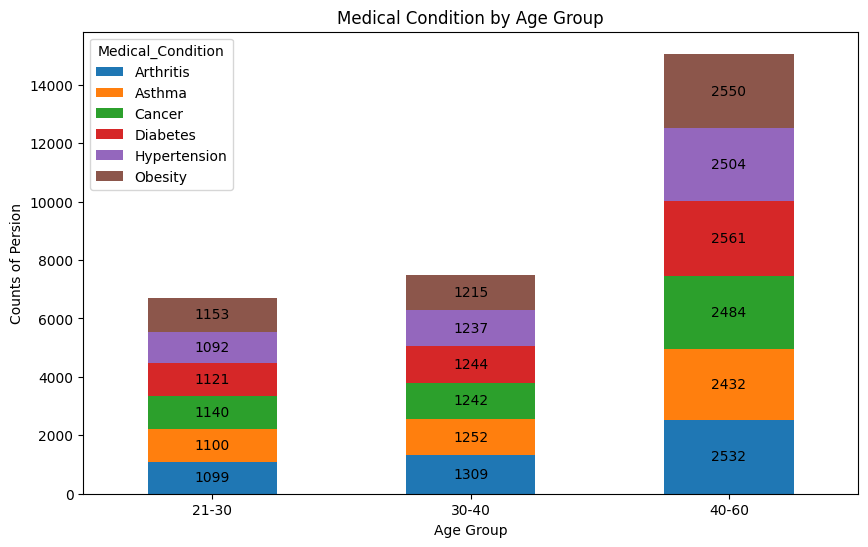

In [4]:
healthCare_Age_Medical_Condition = Group_By_Age.pivot(index='Age_Group', columns='Medical_Condition', values='distinct_Name_count')


# Plotting the bar graph
ax = healthCare_Age_Medical_Condition.plot(kind='bar', stacked=True, figsize=(10, 6))



# Customize the plot
plt.title('Medical Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts of Persion')
plt.legend(title='Medical_Condition')
plt.xticks(rotation=0)  # Set x-axis labels to horizontal

# Annotating the bar with the distinct name count
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Show the plot
plt.show()

In [5]:
display(healthCare_Age_Medical_Condition)

Medical_Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Age_Group,,,,,,
21-30,1099,1100,1140,1121,1092,1153
30-40,1309,1252,1242,1244,1237,1215
40-60,2532,2432,2484,2561,2504,2550


In [6]:
## Numbers of Blood Type
# distinct_count = healthCare['Blood_Type'].nunique()
# display(distinct_count)

bins = [21,30,40,60]
labels = ['21-30','30-40','40-60'] 

# Group by Bllod Type 

# Creat a new column for age group 
healthCare['age_group'] = pd.cut(healthCare['Age'], bins=bins, labels=labels)

Group_By_Blood_Type = healthCare.groupby(['Blood_Type', 'age_group'], observed=True)['Name'].nunique().reset_index()

Group_By_Blood_Type.columns = ['Blood_Type', 'Age_Group', 'distinct_Name_count']

display(Group_By_Blood_Type)

,Blood_Type,Age_Group,distinct_Name_count
0,A+,21-30,848
1,A+,30-40,954
2,A+,40-60,1830
3,A-,21-30,856
4,A-,30-40,944
5,A-,40-60,1850
6,AB+,21-30,799
7,AB+,30-40,947
8,AB+,40-60,1936
9,AB-,21-30,870


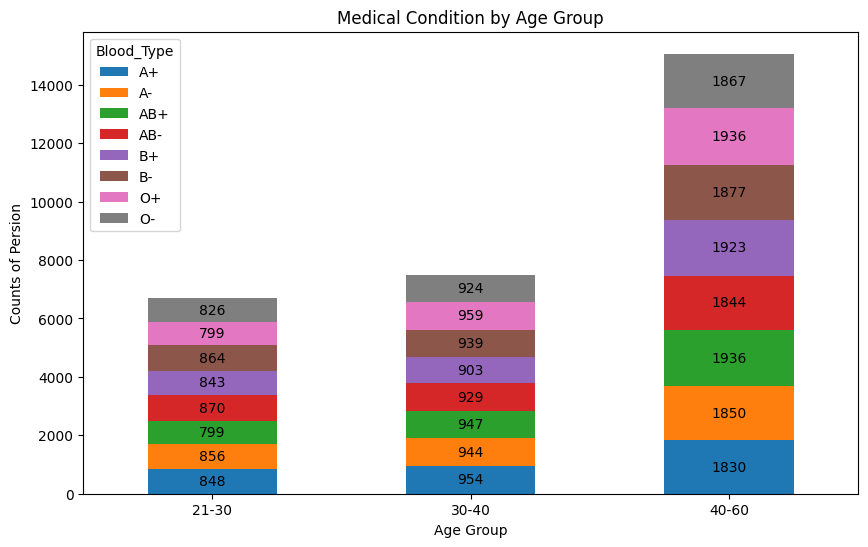

In [7]:
healthCare_Age_Medical_Condition = Group_By_Blood_Type.pivot(index='Age_Group', columns='Blood_Type', values='distinct_Name_count')


# Plotting the bar graph
ax = healthCare_Age_Medical_Condition.plot(kind='bar', stacked=True, figsize=(10, 6))



# Customize the plot
plt.title('Medical Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Counts of Persion')
plt.legend(title='Blood_Type')
plt.xticks(rotation=0)  # Set x-axis labels to horizontal

# Annotating the bar with the distinct name count
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Show the plot
plt.show()

In [8]:
display(healthCare_Age_Medical_Condition)

Blood_Type,A+,A-,AB+,AB-,B+,B-,O+,O-
Age_Group,,,,,,,,
21-30,848,856,799,870,843,864,799,826
30-40,954,944,947,929,903,939,959,924
40-60,1830,1850,1936,1844,1923,1877,1936,1867


In [9]:
display(healthCare)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,age_group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,21-30
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,NaN
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,NaN
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,21-30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,40-60
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,NaN
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,30-40
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,40-60


In [10]:
for col in healthCare.columns:
    if healthCare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthCare[col].value_counts())
        print('--')

Name
DAvId muNoZ       3
SOnYa aDams       2
terRY gONZaLeZ    2
JaCKsON BARbeR    2
doNALD aViLA      2
                 ..
lInDA JOhNSOn     1
tyLer paRk        1
caROl MyERS       1
sHEila MCmaHoN    1
HARoLD ACOSTa     1
Name: count, Length: 49992, dtype: int64
--
Gender
Male      27774
Female    27726
Name: count, dtype: int64
--
Blood_Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64
--
Medical_Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
--
Date_of_Admission
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
              ..
2023-04-12    14
2022-05-28    14
2022-05-23    13
2019-07-22    13
2022-02-05    12
Name: count, Length: 1827, dtype: int64
--
Insurance_Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cros

In [ ]:
for col in healthCare.columns:
    if healthCare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthCare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)